# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [285]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [286]:
#Your code here
df.columns = df.columns.str.strip()
df = df.rename(columns={'C/A':'c/a','UNIT':'unit','SCP':'scp','STATION':'station','LINENAME':'linename','DIVISION':'division','DATE':'date','TIME':'time','DESC':'desc','ENTRIES':'entries','EXITS':'exits'})
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [287]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [288]:
# Your code here
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [289]:
%%time
# step 1 - create a dict where the key is the station name, and the value is the number of lines
# associated with that station

temp_dict = df.groupby(['station'])['linename'].nunique()
print("temp_dict complete")

temp_dict complete
CPU times: user 121 ms, sys: 17.5 ms, total: 138 ms
Wall time: 136 ms


In [290]:
temp_dict.head(10)
# temp_dict.groupby('station').count()
# temp_dict.info
# temp_dict['1 AV']

station
1 AV               1
103 ST             3
103 ST-CORONA      1
104 ST             2
110 ST             1
111 ST             3
116 ST             3
116 ST-COLUMBIA    1
121 ST             1
125 ST             4
Name: linename, dtype: int64

In [291]:
%%time
# Create Num_Lines column, fill it with value from each records station column
df['Num_Lines'] = df['station']

CPU times: user 1.65 ms, sys: 318 µs, total: 1.96 ms
Wall time: 1.64 ms


In [292]:
df.head(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,59 ST
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,59 ST
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,59 ST
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,59 ST
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,59 ST
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,59 ST
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,59 ST
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,59 ST
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,59 ST
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524,59 ST


In [293]:
%%time
# .replace works as expected but .map is not changing the values in Num_Lines
# df['Num_Lines'].map(temp_dict)
df['Num_Lines'].replace(temp_dict, inplace=True)

CPU times: user 3.77 s, sys: 45 ms, total: 3.82 s
Wall time: 3.82 s


In [294]:
df.head(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,3
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,3
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,3
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,3
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524,3


In [295]:
df['Num_Lines'].value_counts()

1    123776
2     36877
3     30547
4      6425
Name: Num_Lines, dtype: int64

## Write a function to clean a column name.

In [296]:
def clean(col_name):
    cleaned = col_name.strip() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    cleaned = col_name.lower()
    return cleaned

In [297]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [298]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [299]:
#Your code here
# 1. convert date columns to datetime format
df['date_time'] = pd.to_datetime(df.date)
# 2. create a day_of_week column
df['day_of_week_number'] = df['date_time'].dt.weekday
df['day_of_week'] = df['date_time'].dt.weekday_name
df.head(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,date_time,day_of_week_number,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3,2018-08-25,5,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3,2018-08-25,5,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3,2018-08-25,5,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3,2018-08-25,5,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3,2018-08-25,5,Saturday
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,3,2018-08-25,5,Saturday
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,3,2018-08-26,6,Sunday
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,3,2018-08-26,6,Sunday
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,3,2018-08-26,6,Sunday
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524,3,2018-08-26,6,Sunday


In [348]:
chart_data = df.groupby(by=['day_of_week_number'])['entries','exits'].sum()
chart_data

,entries,exits
day_of_week_number,,
0,1114237052454,911938153513
1,1143313287046,942230721477
2,1123655222441,920630864687
3,1122723988662,920691927110
4,1110224700078,906799065337
5,1115661545514,909142081474
6,1192306179082,959223750461


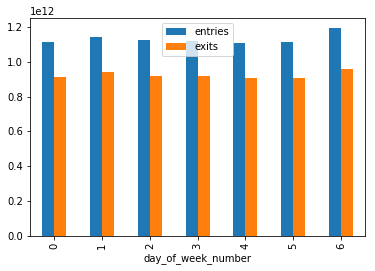

In [349]:
# 3. create the graph
chart_data.plot(kind='bar')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [351]:
# df['temp_col_1'] = df.date_time.dt.dayofweek
# df['temp_col_2'] = df['date_time'].dt.weekday

# df.head(10)
# df.drop(['temp_col_1','temp_col_2'], axis=1, inplace=True)
# chart_data

In [ ]:
chart_data = chart_data.reset_index()

In [355]:
chart_data['entry_exit_sum'] = chart_data['entries'] = chart_data['exits']
chart_data.head(10)


,day_of_week_number,entries,exits,weekend,entry_exit_sum
0,0,911938153513,911938153513,False,911938153513
1,1,942230721477,942230721477,False,942230721477
2,2,920630864687,920630864687,False,920630864687
3,3,920691927110,920691927110,False,920691927110
4,4,906799065337,906799065337,False,906799065337
5,5,909142081474,909142081474,True,909142081474
6,6,959223750461,959223750461,True,959223750461


In [357]:
#Your code here
chart_data['weekend'] = chart_data.day_of_week_number.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
weekend_data = chart_data.groupby('weekend').mean()
weekend_data

,day_of_week_number,entries,exits,entry_exit_sum
weekend,,,,
False,2.0,9.204581e+11,9.204581e+11,9.204581e+11
True,5.5,9.341829e+11,9.341829e+11,9.341829e+11


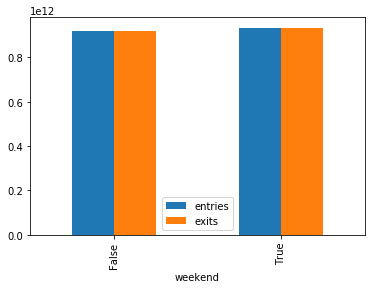

In [358]:
weekend_data[['entries', 'exits']].plot(kind='bar')

In [ ]:
#The average total of entries and exits is higher for weekend days than for weekdays

# Drop a couple of columns

In [359]:
# Your code here
df.head(5)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,date_time,day_of_week_number,day_of_week,entries_exits_sum
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3,2018-08-25,5,Saturday,9019251
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3,2018-08-25,5,Saturday,9019275
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3,2018-08-25,5,Saturday,9019334
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3,2018-08-25,5,Saturday,9019494
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3,2018-08-25,5,Saturday,9019733


In [361]:
df.drop(['scp','c/a'], axis=1, inplace=True)
df.head(5)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,date_time,day_of_week_number,day_of_week,entries_exits_sum
0,NQR456W,R051,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3,2018-08-25,5,Saturday,9019251
1,NQR456W,R051,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3,2018-08-25,5,Saturday,9019275
2,NQR456W,R051,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3,2018-08-25,5,Saturday,9019334
3,NQR456W,R051,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3,2018-08-25,5,Saturday,9019494
4,NQR456W,R051,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3,2018-08-25,5,Saturday,9019733
